# ML-Regressionsmodelle 
**Die ML-Modelle in dem Notebook mit den statsischen Maßen:**
- SVR
- Randomforestregressor
- XGB
- Neuronalesnetz
- KNNR

In [1]:
from help_functions import loadAggData
from sklearn.model_selection import  GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import joblib


## SVR

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'C': 10}


+-------+---------+---------+------+
|   R²  |   MAE   |   RSME  | MAPE |
+-------+---------+---------+------+
| 0.978 | 120.479 | 151.676 | 6.86 |
+-------+---------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.0454307  0.06032129 0.05495704 0.06006084 0.06076192]
Durchschnittliches RMSE: 0.0563


/home/david/miniconda3/envs/BIAFO/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


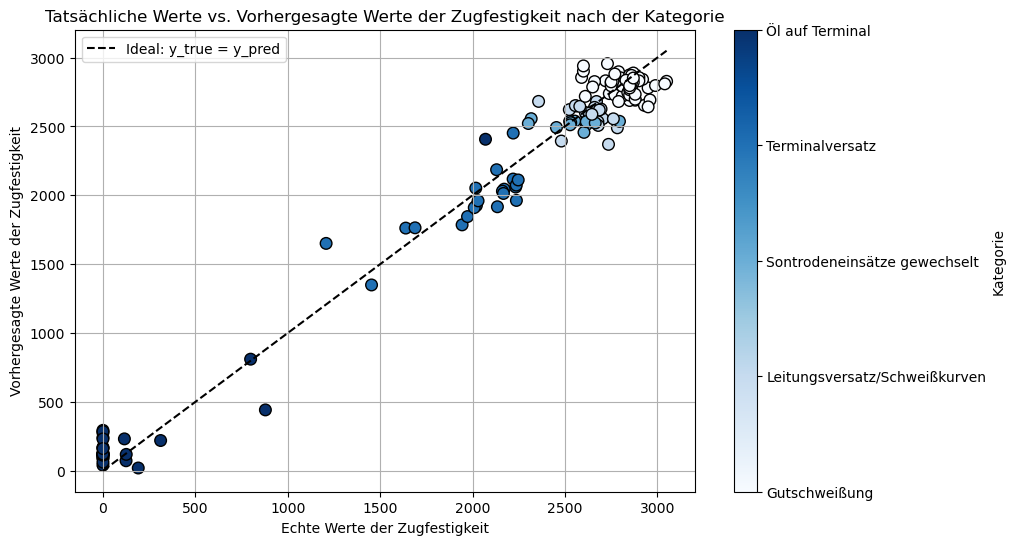

In [2]:
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=True)

param_dist = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

svr = SVR()
random_search = RandomizedSearchCV(
    estimator=svr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = True)

# RandomforestRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.973 | 94.038 | 166.265 | 6.53 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [135.00161129 166.99682762 170.26368846 155.24729038 166.27553959]
Durchschnittliches RMSE: 158.7570


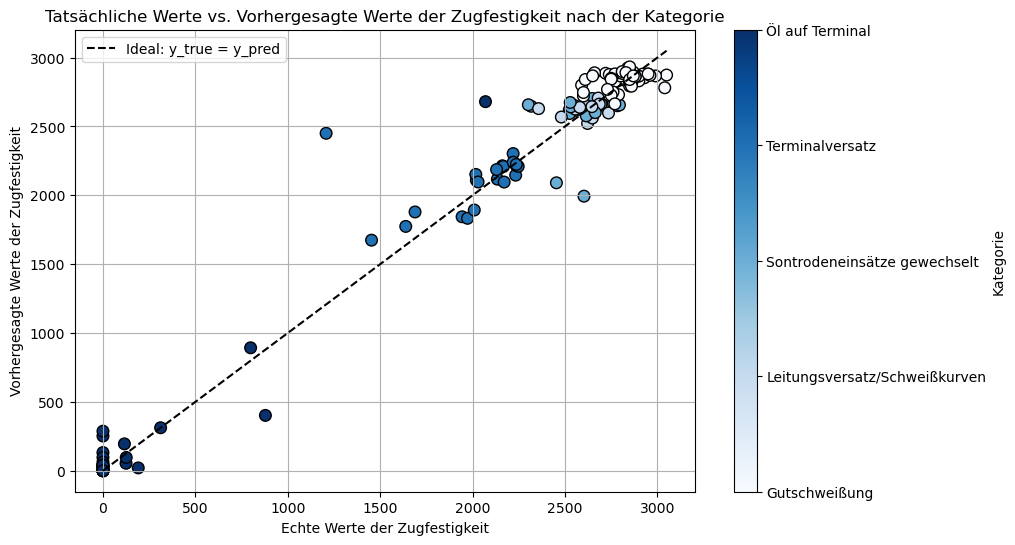

In [3]:

loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)



param_dist = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],

}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = False)

Beste Parameter: {'n_estimators': 100, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.979 | 89.261 | 145.522 | 5.6  |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [133.79787998 177.95239471 215.90666509 144.32683667 158.76125902]
Durchschnittliches RMSE: 166.1490


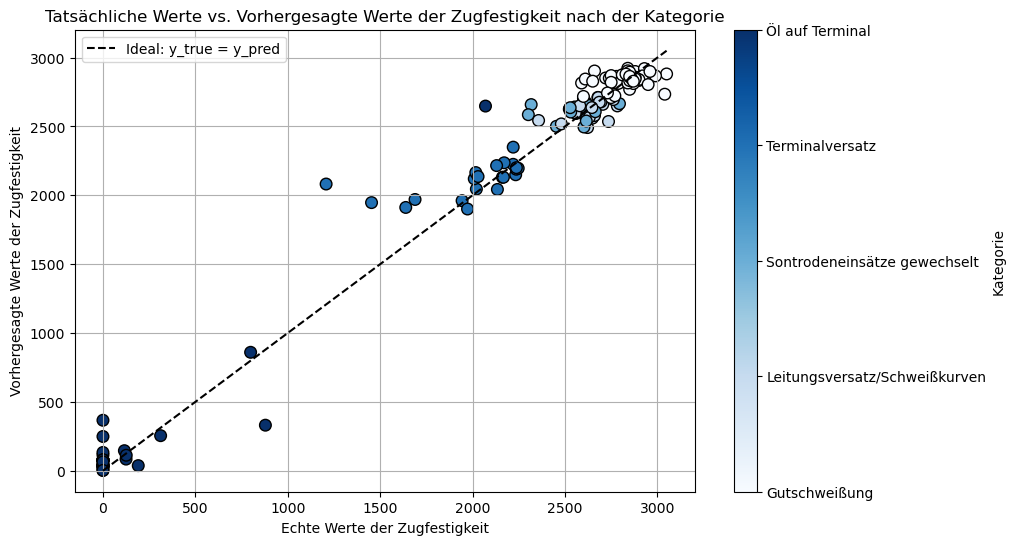

In [4]:

loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10, 15],
    "min_samples_leaf": [1, 2, 4, 8],
    "max_features": ['sqrt', 'log2', None],
    "bootstrap": [True, False],
}

rf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = False)

# XGB 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'subsample': 0.6, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 1.0}


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.976 | 87.868 | 158.037 | 6.5  |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [143.43265094 147.49585072 164.4701577  166.33610862 159.38817962]
Durchschnittliches RMSE: 156.2246


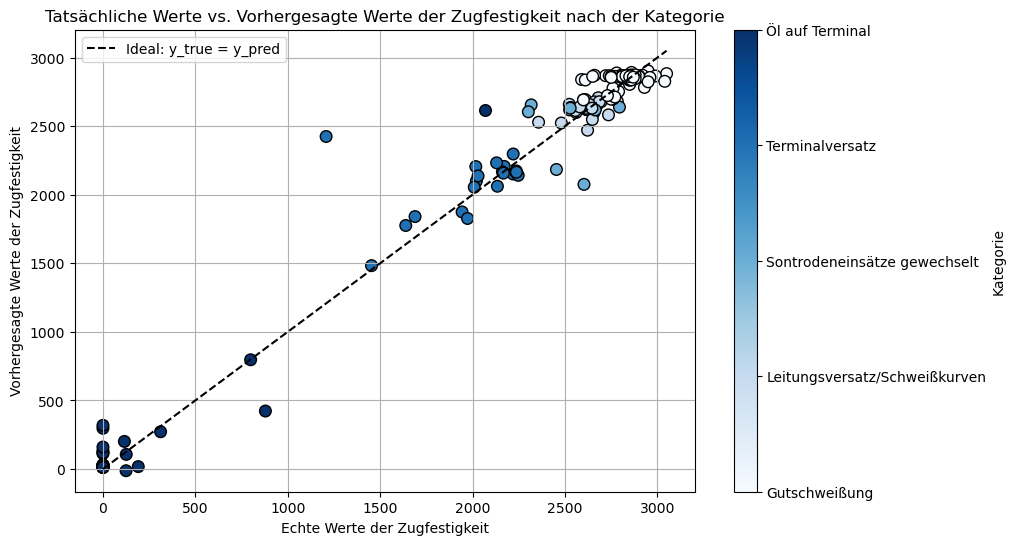

In [5]:

loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]

x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=False)

param_dist = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 6, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "min_child_weight": [1, 3, 5],
    "gamma": [0, 0.1, 0.2, 0.5],
}

xgb = XGBRegressor(objective="reg:squarederror", random_state=42)


random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)


random_search.fit(x_train, y_train)


best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)


print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = False)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = False)

# KNeighborsRegressor

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Beste Parameter: {'weights': 'uniform', 'p': 2, 'n_neighbors': 8, 'metric': 'minkowski'}


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.981 | 92.192 | 139.715 | 6.74 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.0384783  0.05102937 0.06038399 0.05176197 0.05074698]
Durchschnittliches RMSE: 0.0505


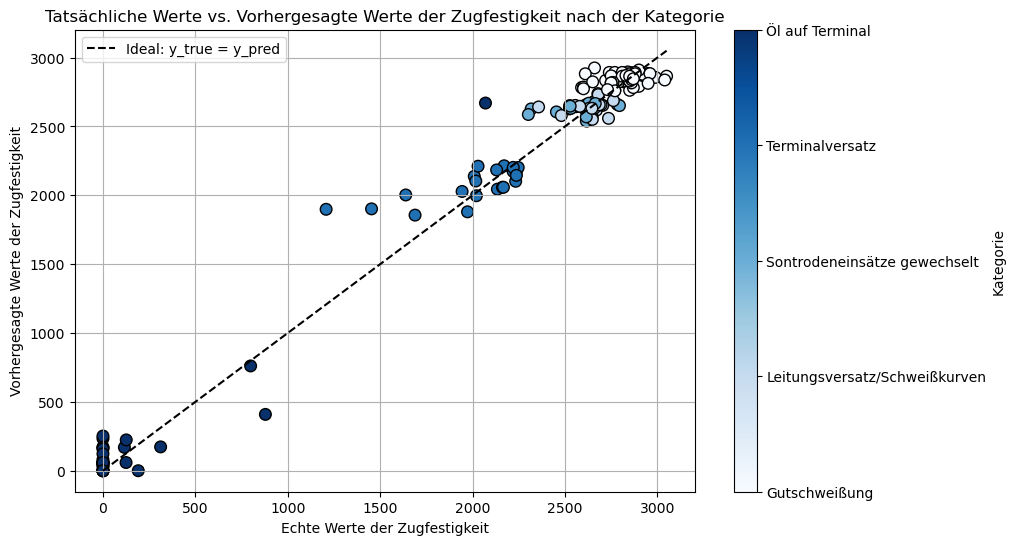

In [6]:

loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=True)

param_dist = {
    'n_neighbors': [int(x) for x in range(1, 50)],  #
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
}

knr = KNeighborsRegressor()
random_search = RandomizedSearchCV(
    estimator=knr,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=1,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(x_test)
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = True)

Beste Parameter: {'model__optimizer': 'adam', 'model__neurons': 32, 'model__dropout_rate': 0.0, 'model__activation': 'relu', 'epochs': 100, 'batch_size': 64}


+-------+-------+---------+------+
|   R²  |  MAE  |   RSME  | MAPE |
+-------+-------+---------+------+
| 0.979 | 100.0 | 147.885 | 6.76 |
+-------+-------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.04069943 0.0613009  0.05907054 0.05490712 0.05369599]
Durchschnittliches RMSE: 0.0539


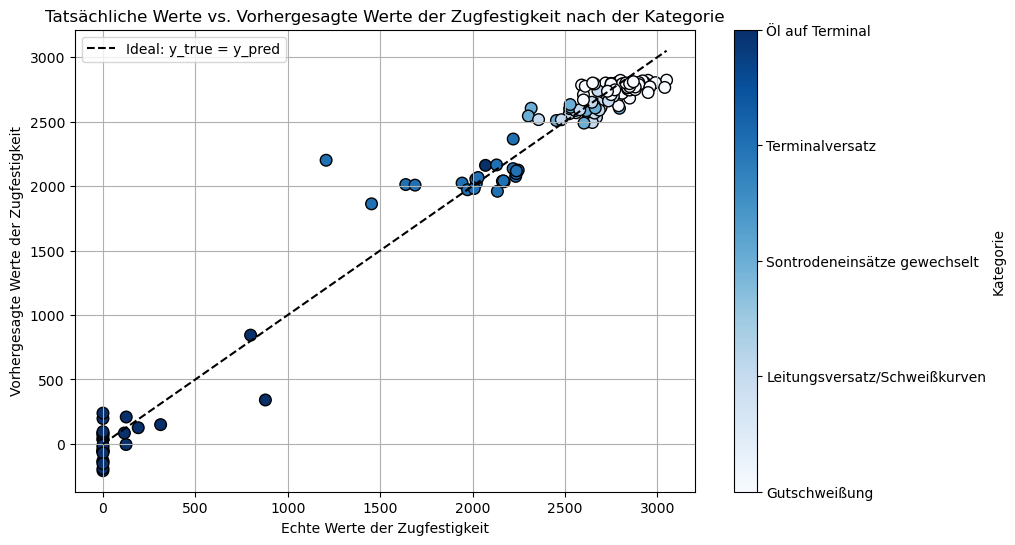

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Daten laden und vorbereiten
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=True)

# Modell-Definition für KerasRegressor
def create_model(optimizer="adam", activation="relu", neurons=32, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, input_dim=x_train.shape[1], activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output Layer für Regression
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

# KerasRegressor-Wrapper
model = KerasRegressor(model=create_model, verbose=0)

# Hyperparameter für die Suche
param_dist = {
    "model__optimizer": ["adam", "rmsprop"],
    "model__activation": ["relu", "tanh"],
    "model__neurons": [16, 32, 64],
    "model__dropout_rate": [0.0, 0.2, 0.4],
    "batch_size": [16, 32, 64],
    "epochs": [50, 100],
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=1,
    random_state=42,
)
random_search.fit(x_train, y_train)

# Bestes Modell und Parameter
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Vorhersage auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse ausgeben
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred, rescale=True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred, rescale=True)


Beste Parameter: {'solver': 'lbfgs', 'max_iter': 1000, 'learning_rate': 'adaptive', 'hidden_layer_sizes': (32,), 'alpha': 0.0001, 'activation': 'relu'}


+-------+--------+---------+------+
|   R²  |  MAE   |   RSME  | MAPE |
+-------+--------+---------+------+
| 0.983 | 94.506 | 133.862 | 5.96 |
+-------+--------+---------+------+
Kreuzvalidierungs-RMSE (pro Fold): [0.04508308 0.04812226 0.05545115 0.04960166 0.05512508]
Durchschnittliches RMSE: 0.0507


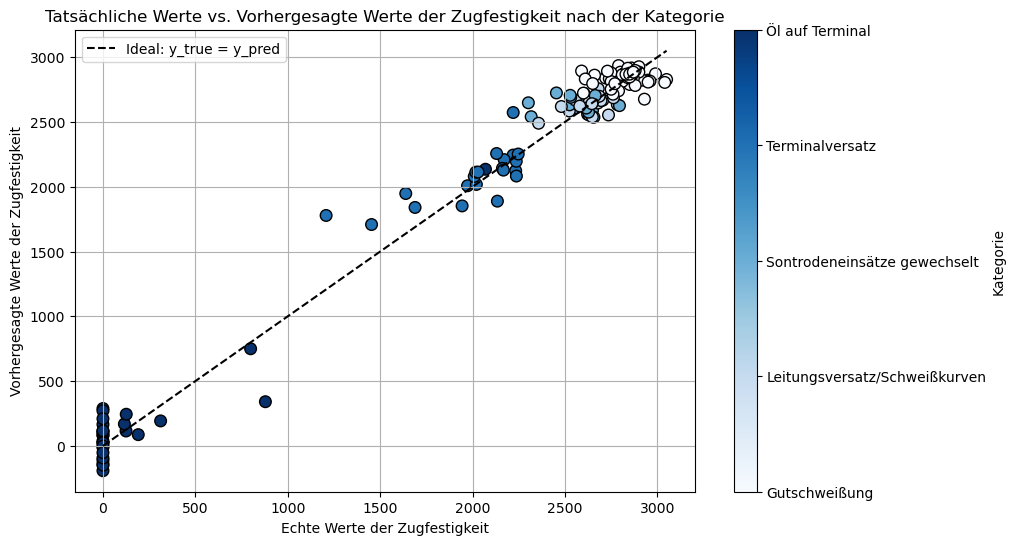

In [4]:

# Daten laden und vorbereiten
loader = loadAggData()
filter_c = ["P_std", "F_max", "T_sum"]
x_train, x_test, y_train, y_test = loader.load_and_split_regression_data(filter_columns=filter_c, normalize=True)

# Hyperparameter für die Suche
param_dist = {
    "hidden_layer_sizes": [(32,), (64,), (32, 32), (64, 32)],
    "activation": ["relu", "tanh"],
    "solver": ["adam", "lbfgs"],
    "alpha": [0.0001, 0.001, 0.01],
    "learning_rate": ["constant", "adaptive"],
    "max_iter": [500, 1000, 2000],  #
}

# MLPRegressor
mlp = MLPRegressor(random_state=42)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    verbose=0,
    n_jobs=-1,
    random_state=42,
)
random_search.fit(x_train, y_train)

# Bestes Modell und Parameter
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Vorhersage auf Testdaten
y_pred = best_model.predict(x_test)

# Ergebnisse ausgeben
print("Beste Parameter:", best_params)
loader.regression_statistics(y_test, y_pred,rescale = True)
loader.cross_validation_statistics(x_train, y_train, best_model)
loader.plot_regression_results(y_test, y_pred,rescale = True)